In [1]:
#1. Multiclass Perceptron
#Let's start with the code for the multiclass Perceptron algorithm. This is similar in spirit to our earlier binary Perceptron algorithm, except that now there is a linear function for each class.

#If there are k classes, we will assume that they are numbered 0,1,...,k-1. For d-dimensional data, the classifier will be parametrized by:

#w: this is a kxd numpy array with one row for each class
#b: this is a k-dimensional numpy array with one offset for each class
#Thus the linear function for class j (where j lies in the range 0 to k-1) is given by w[j,:], b[j].

#The first procedure, evaluate_classifier, takes as input the parameters of a linear classifier (w,b) as well as a data point (x) and returns the prediction of that classifier at x.
def evaluate_classifier(w,b,x):
    k = len(b)
    scores = np.zeros(k)
    for j in range(k):
        scores[j] = np.dot(w[j,:],x) + b[j]
    return int(np.argmax(scores))

In [4]:
#Here is the multiclass Perceptron training procedure. It is invoked as follows:

#w,b,converged = train_multiclass_perceptron(x,y,k,n_iters)
#where

#x: n-by-d numpy array with n data points, each d-dimensional
#y: n-dimensional numpy array with the labels (in the range 0 to k-1)
#k: the number of classes
#n_iters: the training procedure will run through the data at most this many times (default: 100)
#w,b: parameters for the final linear classifier, as above
#converged: flag (True/False) indicating whether the algorithm converged within the prescribed number of iterations
#If the data is not linearly separable, then the training procedure will not converge.
def train_multiclass_perceptron(x,y,k,n_iters=100):
    n,d = x.shape
    w = np.zeros((k,d))
    b = np.zeros(k)
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for j in I:
            pred_y = evaluate_classifier(w,b,x[j,:])
            true_y = int(y[j])
            if pred_y != true_y:
                w[true_y,:] = w[true_y,:] + x[j,:]
                b[true_y] = b[true_y] + 1.0
                w[pred_y,:] = w[pred_y,:] - x[j,:]
                b[pred_y] = b[pred_y] - 1.0
                done = False
        iters = iters + 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: "), iters
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged

In [29]:
#This next roxcxutine takes as input a two-dimensional data set as well as a classifier. It plots the points, with different colors for different labels, and shows the decision boundaries of the classifier. It is invoked as follows:

#display_data_and_boundary(x,y,pred_fn)
#where

#x and y are the two-dimensional data and their labels (in the range 0,...,k-1)
#pred_fn is the classifier: it is a function that takes a data point and returns a label

#fc c redxz
def display_data_and_boundary(x,y,pred_fn):
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

In [31]:
#The following procedure, run_multiclass_perceptron, loads a labeled two-dimensional data set, learns a linear classifier using the Perceptron algorithm, and then displays the data as well as the boundary.

#The data file is assumed to contain one data point per line, along with a label, like:

#3 8 2 (meaning that point x=(3,8) has label y=2)

def run_multiclass_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    k = int(max(y)) + 1
    print ("Number of classes: "), k
    # Run the Perceptron algorithm for at most 1000 iterations
    w,b,converged = train_multiclass_perceptron(x,y,k,1000)
    # Show the data and boundary
    pred_fn = lambda p: evaluate_classifier(w,b,p)
    display_data_and_boundary(x,y,pred_fn)

Number of classes: 
Perceptron algorithm: iterations until convergence: 


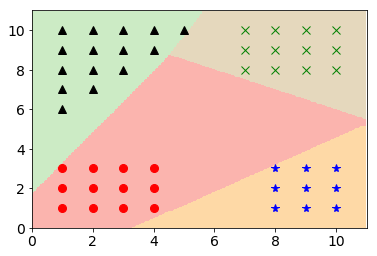

In [32]:
run_multiclass_perceptron('data_3.txt')

Number of classes: 
Perceptron algorithm: iterations until convergence: 


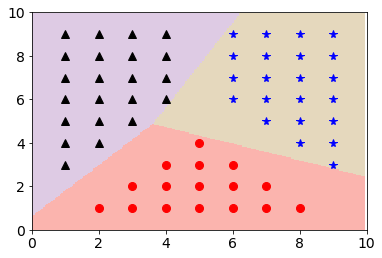

In [33]:
run_multiclass_perceptron('data_4.txt')

In [34]:
#Now let's see how multiclass SVM fares on these same data sets. We start with an analog of the run_multiclass_perceptron function. The key difference is that the SVM version, run_multiclass_svm, takes a second parameter: the regularization constant C in the convex program of the soft-margin SVM

from sklearn.svm import SVC, LinearSVC
def run_multiclass_svm(datafile,C_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    k = int(max(y)) + 1
    print ("Number of classes: "), k
    # Train an SVM
    clf = LinearSVC(loss='hinge', multi_class='crammer_singer', C=C_value)
    clf.fit(x,y)
    # Show the data and boundary
    pred_fn = lambda p: clf.predict(p.reshape(1,-1))    
    display_data_and_boundary(x,y,pred_fn)

Number of classes: 


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


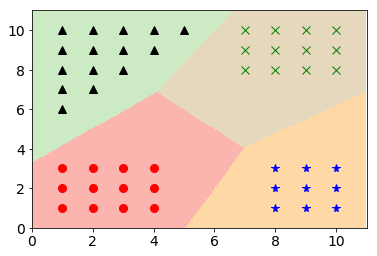

In [35]:
run_multiclass_svm('data_3.txt',10.0)



Number of classes: 


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


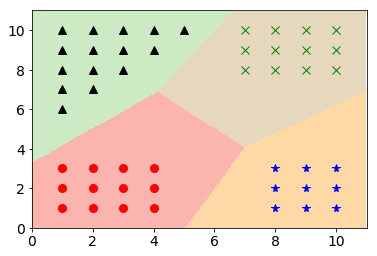

In [36]:
run_multiclass_svm('data_3.txt',5.0)

Number of classes: 


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


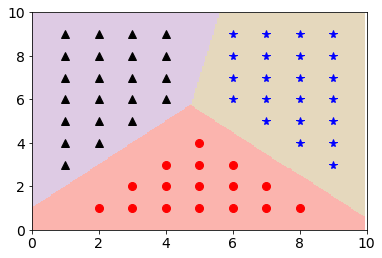

In [37]:
run_multiclass_svm('data_4.txt',100.0)

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


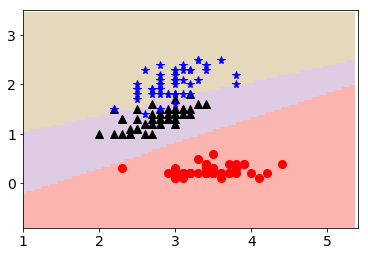

In [38]:
# Load IRIS data
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
# Select just two of the four features
features = [1,3]
x = x[:,features]
# Train SVM
clf = LinearSVC(loss='hinge', multi_class='crammer_singer')
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

In [40]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [44]:
print(clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)
